# Aims
In this notebook I will look at the regimes of agreement of the SES and the full 4LS (with the doubly excited state). I should expect that there will be a phonon coupling-strength and temperature dependence on this. Although there is likely to be little population in the doubly excited, it will also probably have an effect on populations. It would be good to look at dynamics and steadystate populations and coherences for the full 4LS and 3LS models.

In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import time
import heatmap_setup as hm
import numpy as np

from dimer_setup import *
from utils import *
from style import *

In [4]:
T_ph = 300.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 0.# #1.
alpha_EM = 0. #5.309e-3 # inv_ps_to_inv_cm *10^-3
N =4
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

d1 = load_obj('DATA/DYNAMICS_2019/3LS_dynamics_1')
data1, PARAMS1 = d1[0], d1[1]

data_num = 1
def get_dynamics_data(PARAMS, data_num):
    #print PARAMS['H_sub'].eigenstates()
    rwa_out = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)
    #add_rwa_out = get_H_and_L_add(PARAMS,silent=False, threshold=0., rwa=False)
    #add_out = get_H_and_L_add(PARAMS,silent=False, threshold=0., rwa=True)

    evals, evecs = exciton_states(PARAMS, shift=False)
    dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
    eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
    ops = make_expectation_operators(PARAMS)
    site_x = (site_coherence+site_coherence.dag())
    
    # 1 is weak coupling, room temperature, low freq
    timelist = np.linspace(0, 1.9, 1900)

    init_sys = XX_proj
    print init_sys
    v0 = tensor(init_sys, qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))
    
    e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y'], ops['XX'], ops['OO']]
    dat1 = qt.mesolve(rwa_out['H_RWA'][1], v0, timelist, c_ops=[rwa_out['L_RWA']], 
                      e_ops=e_ops, progress_bar=True)

    dat11 = qt.mesolve(rwa_out['H'][1], v0, timelist, c_ops=[rwa_out['L']], 
                      e_ops=e_ops, progress_bar=True)

    try:
        filename = 'DATA/DYNAMICS_2019/4LS_dynamics_'+str(data_num)
        save_obj([dat11, PARAMS], filename)
        print "Filename: "+filename
    except Exception as e:
        print "Could not save data because ", e
    return timelist, dat1, dat11

In [5]:
PARAMS['exc'] = 10
rwa_out = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)
ss = steadystate(rwa_out['H'][1], [rwa_out['L']])
ops = make_expectation_operators(PARAMS)
ss_pops_ptrace = np.diag(ENR_ptrace(ss, 0, N).full())
ss_pops = [(ss*op).tr().real for op in [ops['OO'], ops['XO'], ops['OX'], ops['XX']]]
print ss_pops_ptrace
print ss_pops

ss = steadystate(rwa_out['H_RWA'][1], [rwa_out['L_RWA']])
ops = make_expectation_operators(PARAMS)
ss_pops_ptrace = np.diag(ENR_ptrace(ss, 0, N).full())
ss_pops = [(ss*op).tr().real for op in [ops['OO'], ops['XO'], ops['OX'], ops['XX']]]
print ss_pops_ptrace
print ss_pops

****************************************************************
The operators took 1.29421210289 and have dimension 64.
Building the RC Liouvillian took 1.350 seconds.
It is 4096by4096. The full basis would be 4096by4096
****************************************************************
The operators took 1.07227396965 and have dimension 64.
Building the RC Liouvillian took 1.140 seconds.
It is 4096by4096. The full basis would be 4096by4096
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[    0.     0.     0.     0.]
 [    0.  3535.    35.     0.]
 [    0.    35.  3500.     0.]
 [    0.     0.     0.  7035.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[    0.     0.     0.     0.]
 [    0.  3535.    35.     0.]
 [    0.    35.  3500.     0.]
 [    0.     0.     0.  7035.]]
Not including optical dissipator
Completed non-additive liouvillians in RWA and non-RWA form
[ 0.94137645+0.j  0.05862234+0.j 

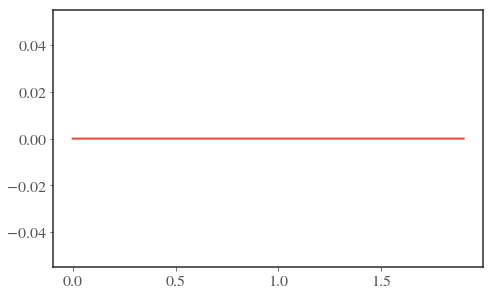

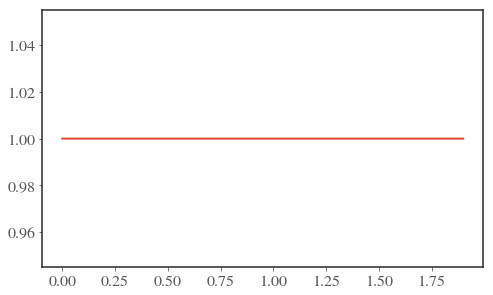

In [8]:
dat_el = qt.mesolve(rwa_out['H_RWA'][0], XX_proj, timelist, e_ops=[OO_proj, XX_proj])
plt.figure()
plt.plot(timelist, dat_el.expect[0])
plt.figure()
plt.plot(timelist, dat_el.expect[1])

In [6]:
PARAMS['exc'] = 10
PARAMS['num_cpus'] = 1
timelist, dat1, dat11 = get_dynamics_data(PARAMS, 1)

****************************************************************
The operators took 2.13600420952 and have dimension 64.
Building the RC Liouvillian took 2.152 seconds.
It is 4096by4096. The full basis would be 4096by4096
****************************************************************
The operators took 1.84063887596 and have dimension 64.
Building the RC Liouvillian took 1.861 seconds.
It is 4096by4096. The full basis would be 4096by4096
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[    0.     0.     0.     0.]
 [    0.  3535.    35.     0.]
 [    0.    35.  3500.     0.]
 [    0.     0.     0.  7035.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[    0.     0.     0.     0.]
 [    0.  3535.    35.     0.]
 [    0.    35.  3500.     0.]
 [    0.     0.     0.  7035.]]
Not including optical dissipator
Completed non-additive liouvillians in RWA and non-RWA form
Quantum object: dims = [[4], [4]]

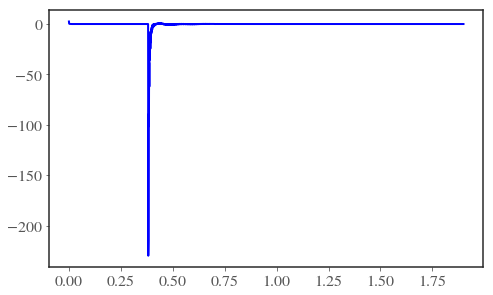

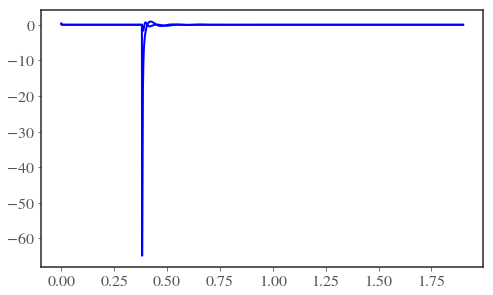

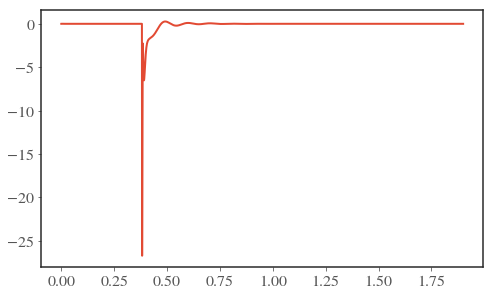

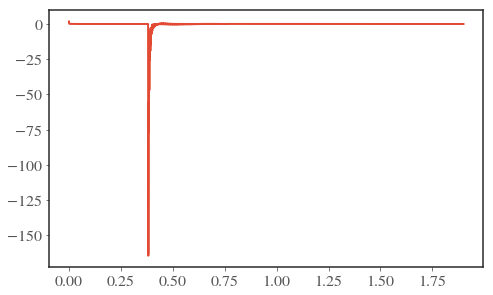

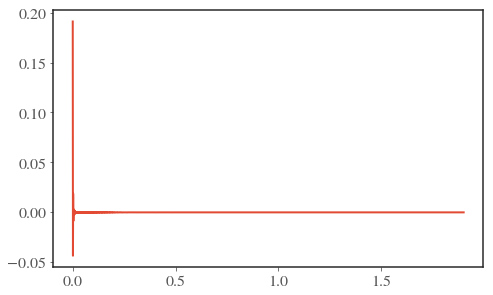

In [9]:
plt.figure()
plt.plot(timelist, dat1.expect[0]+dat1.expect[1]+dat1.expect[7]+dat1.expect[6], c='b')
#plt.plot(timelist, dat11.expect[0]+dat11.expect[1]+dat11.expect[7]+dat11.expect[6], c='r', ls='dashed', alpha=0.3)
plt.figure()
plt.plot(timelist, dat1.expect[0], c='b')
#plt.plot(timelist, dat11.expect[0], c='r', ls='dotted')
plt.plot(timelist, dat1.expect[1], c='b')
#plt.plot(timelist, dat11.expect[1], c='r', ls='dotted')

plt.figure()
plt.plot(timelist, dat1.expect[2])
#plt.plot(timelist, dat11.expect[2])

plt.figure()
plt.plot(timelist, dat1.expect[6])
#plt.plot(timelist, dat11.expect[6])

plt.figure()
plt.plot(timelist, dat1.expect[7])
#plt.plot(timelist, dat11.expect[7], ls='dashed', alpha=0.3)

****************************************************************
The operators took 0.633176803589 and have dimension 52.
Building the RC Liouvillian took 0.645 seconds.
It is 2704by2704. The full basis would be 4096by4096
****************************************************************
The operators took 0.700976133347 and have dimension 52.
Building the RC Liouvillian took 0.716 seconds.
It is 2704by2704. The full basis would be 4096by4096
Full optical Liouvillian took 0.45756483078 seconds.
It took  0.469990968704  seconds to build the Non-secular RWA Liouvillian
Completed non-additive liouvillians in RWA and non-RWA form
10.0%. Run time:   0.34s. Est. time left: 00:00:00:03
20.0%. Run time:   0.68s. Est. time left: 00:00:00:02
30.0%. Run time:   1.01s. Est. time left: 00:00:00:02
40.0%. Run time:   1.34s. Est. time left: 00:00:00:02
50.0%. Run time:   1.68s. Est. time left: 00:00:00:01
60.0%. Run time:   2.01s. Est. time left: 00:00:00:01
70.0%. Run time:   2.34s. Est. time left: 0

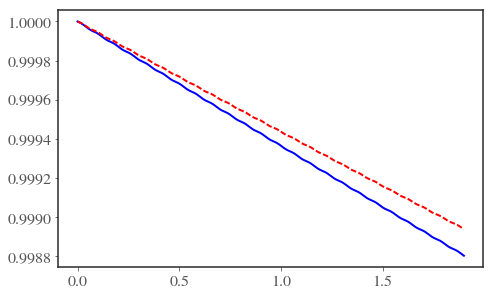

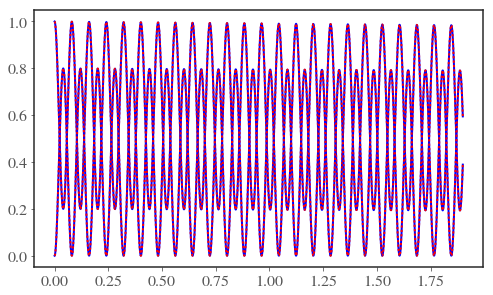

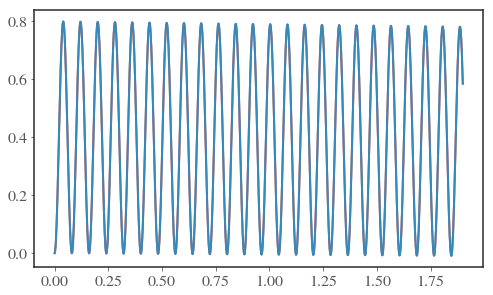

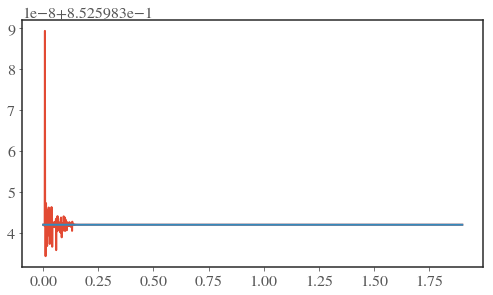

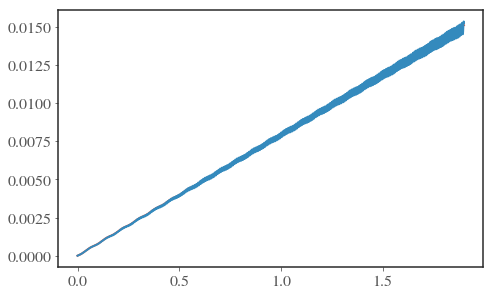

In [16]:
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=0.,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
timelist, dat1, dat11 = get_dynamics_data(PARAMS, 1)
plt.figure()
plt.plot(timelist, dat1.expect[0]+dat1.expect[1]+dat1.expect[7], c='b')
plt.plot(timelist, dat11.expect[0]+dat11.expect[1]+dat1.expect[7], c='r', ls='dashed')
plt.figure()
plt.plot(timelist, dat1.expect[0], c='b')
plt.plot(timelist, dat11.expect[0], c='r', ls='dotted')
plt.plot(timelist, dat1.expect[1], c='b')
plt.plot(timelist, dat11.expect[1], c='r', ls='dotted')

plt.figure()
plt.plot(timelist, dat1.expect[2])
plt.plot(timelist, dat11.expect[2])

plt.figure()
plt.plot(timelist, dat1.expect[6])
plt.plot(timelist, dat11.expect[6])

plt.figure()
plt.plot(timelist, dat1.expect[7])
plt.plot(timelist, dat11.expect[7])